In [33]:
import pandas as pd
import seaborn as sb

from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [8]:
df=pd.read_csv(r"C:\Users\akshita\Downloads\DelhiAQI.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,Delhi,01-01-2018,303.41,415.09,62.76,63.92,11.79,73.16,1.80,18.58,68.75,462
1,Delhi,01-02-2018,277.48,422.59,31.26,53.73,4.26,55.61,1.52,12.43,68.68,439
2,Delhi,01-03-2018,217.01,336.87,37.98,52.24,2.87,50.81,1.29,10.28,54.94,405
3,Delhi,01-04-2018,248.54,377.61,35.56,61.57,4.24,55.17,1.36,14.42,66.31,394
4,Delhi,01-05-2018,240.42,360.99,38.73,54.80,4.57,51.36,1.38,13.20,48.57,398


In [9]:
df= df.drop(['City','Date'], axis=1)
print(df)

      PM2.5    PM10     NO    NO2    NOx    NH3    CO    SO2     O3  AQI
0    303.41  415.09  62.76  63.92  11.79  73.16  1.80  18.58  68.75  462
1    277.48  422.59  31.26  53.73   4.26  55.61  1.52  12.43  68.68  439
2    217.01  336.87  37.98  52.24   2.87  50.81  1.29  10.28  54.94  405
3    248.54  377.61  35.56  61.57   4.24  55.17  1.36  14.42  66.31  394
4    240.42  360.99  38.73  54.80   4.57  51.36  1.38  13.20  48.57  398
..      ...     ...    ...    ...    ...    ...   ...    ...    ...  ...
908   39.80  155.94  10.88  21.46  22.47  31.43  0.87  10.38  18.88  112
909   59.52  308.65  12.67  21.60  23.86  29.27  0.94  10.70  18.05  196
910   44.86  184.12  10.50  21.57  21.94  27.97  0.88  11.58  26.61  233
911   39.80   91.98   5.99  17.96  15.44  28.48  0.84  10.51  37.29  114
912   54.01  128.66   6.33  21.05  16.81  29.06  0.97  11.15  29.73  101

[913 rows x 10 columns]


In [10]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,913.000000,913.000000,913.00000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,105.458171,213.439157,31.97747,43.098346,51.963604,38.338368,1.322881,13.852180,41.454918,228.813801
std,77.477643,116.910831,26.56564,15.931366,30.946864,9.813347,0.562686,4.226043,12.438408,113.960050
min,10.240000,19.510000,4.42000,14.360000,1.870000,19.900000,0.520000,6.180000,16.510000,51.000000
25%,49.960000,120.820000,13.19000,30.730000,29.360000,30.860000,0.930000,10.440000,31.560000,129.000000
50%,81.870000,193.790000,22.50000,41.230000,43.920000,36.610000,1.160000,13.250000,40.160000,208.000000
75%,137.290000,281.530000,40.92000,54.010000,66.400000,44.470000,1.520000,16.550000,50.560000,306.000000
max,582.280000,761.910000,158.63000,106.040000,195.810000,75.880000,3.660000,33.500000,76.320000,659.000000


In [11]:
df[['PM2.5','PM10']].quantile(0.9)

PM2.5    211.250
PM10     370.826
Name: 0.9, dtype: float64

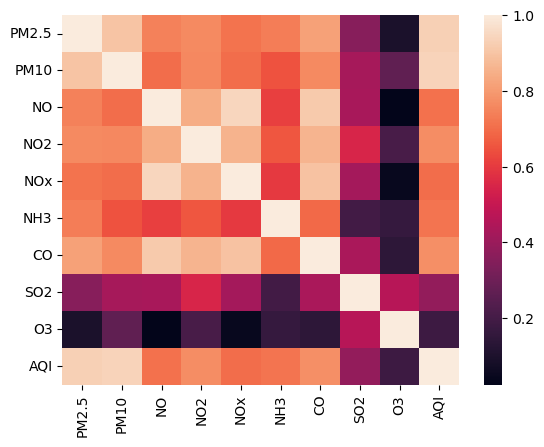

In [12]:
dataplot=sb.heatmap(df.corr())

In [13]:
zscore1= np.abs(stats.zscore(df['PM2.5']))
print(np.where(zscore1>3))

zscore2= np.abs(stats.zscore(df['PM10']))
print(np.where(zscore2>3))

zscore3= np.abs(stats.zscore(df['NO']))
print(np.where(zscore3>3))

zscore4= np.abs(stats.zscore(df['NO2']))
print(np.where(zscore4>3))

(array([308, 311, 356, 357, 367, 381, 669, 671, 680, 681, 682, 683, 730],
      dtype=int64),)
(array([163, 164, 165, 669, 671, 683], dtype=int64),)
(array([298, 299, 330, 331, 335, 336, 337, 338, 339, 353, 356, 357, 363,
       375, 376, 384, 400, 703, 731], dtype=int64),)
(array([ 40,  51, 384, 689, 703], dtype=int64),)


In [14]:
for i in np.where((zscore1>3) | (zscore2>3) | (zscore3>3) | (zscore4>3)):
    df.drop(i, inplace=True)

In [15]:
print("New dimensions:", df.shape)

New dimensions: (877, 10)


In [16]:
X= df.drop(['AQI'], axis=1)
y= df[['AQI']]

x_train, x_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=42)

In [17]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Logistic regression

In [36]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred=model.predict(x_test_scaled)

print("Classification report:",confusion_matrix(y_test, y_pred))
#print("Cross validation accuracy:", cross_val_score(y_pred, x_train_scaled, y, cv=50))
print("Accuracy of Linear Regression:",accuracy_score(y_test, y_pred))

C:\Users\akshita\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Accuracy of Linear Regression: 0.011363636363636364


C:\Users\akshita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
